## Importing Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Exploring Dataset

In [2]:
df_alexa = pd.read_csv('../input/amazon-alexa-reviews/amazon_alexa.tsv', sep = '\t')

In [3]:
df_alexa.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
df_alexa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Lets look into positive and negative reviews

In [5]:
positive = df_alexa[df_alexa['feedback'] == 1] 
positive

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [6]:
negative = df_alexa[df_alexa['feedback'] == 0]
negative

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


<AxesSubplot:xlabel='feedback', ylabel='count'>

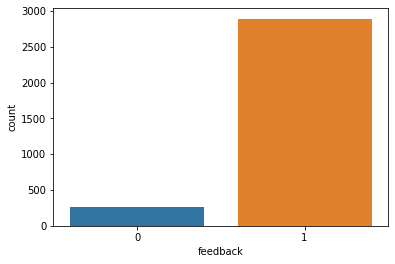

In [7]:
# count of negative and postive reviews
sns.countplot(x = 'feedback' ,data = df_alexa, label = 'Count')

(0.0, 2514.6000000000004)

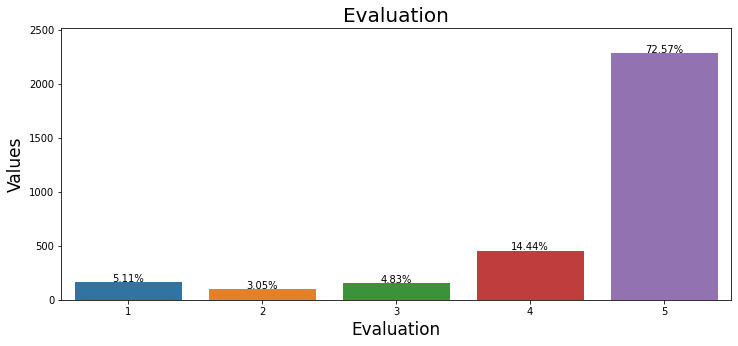

In [8]:
# Now lets look at tha ratings

total = len(df_alexa)
ax1 = plt.figure(figsize=(12,5))

g = sns.countplot(x='rating', data=df_alexa)
g.set_title("Evaluation", fontsize=20)
g.set_xlabel("Evaluation", fontsize=17)
g.set_ylabel("Values", fontsize=17)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=10) 
g.set_ylim(0, max(sizes) * 1.1)

(0.0, 567.6)

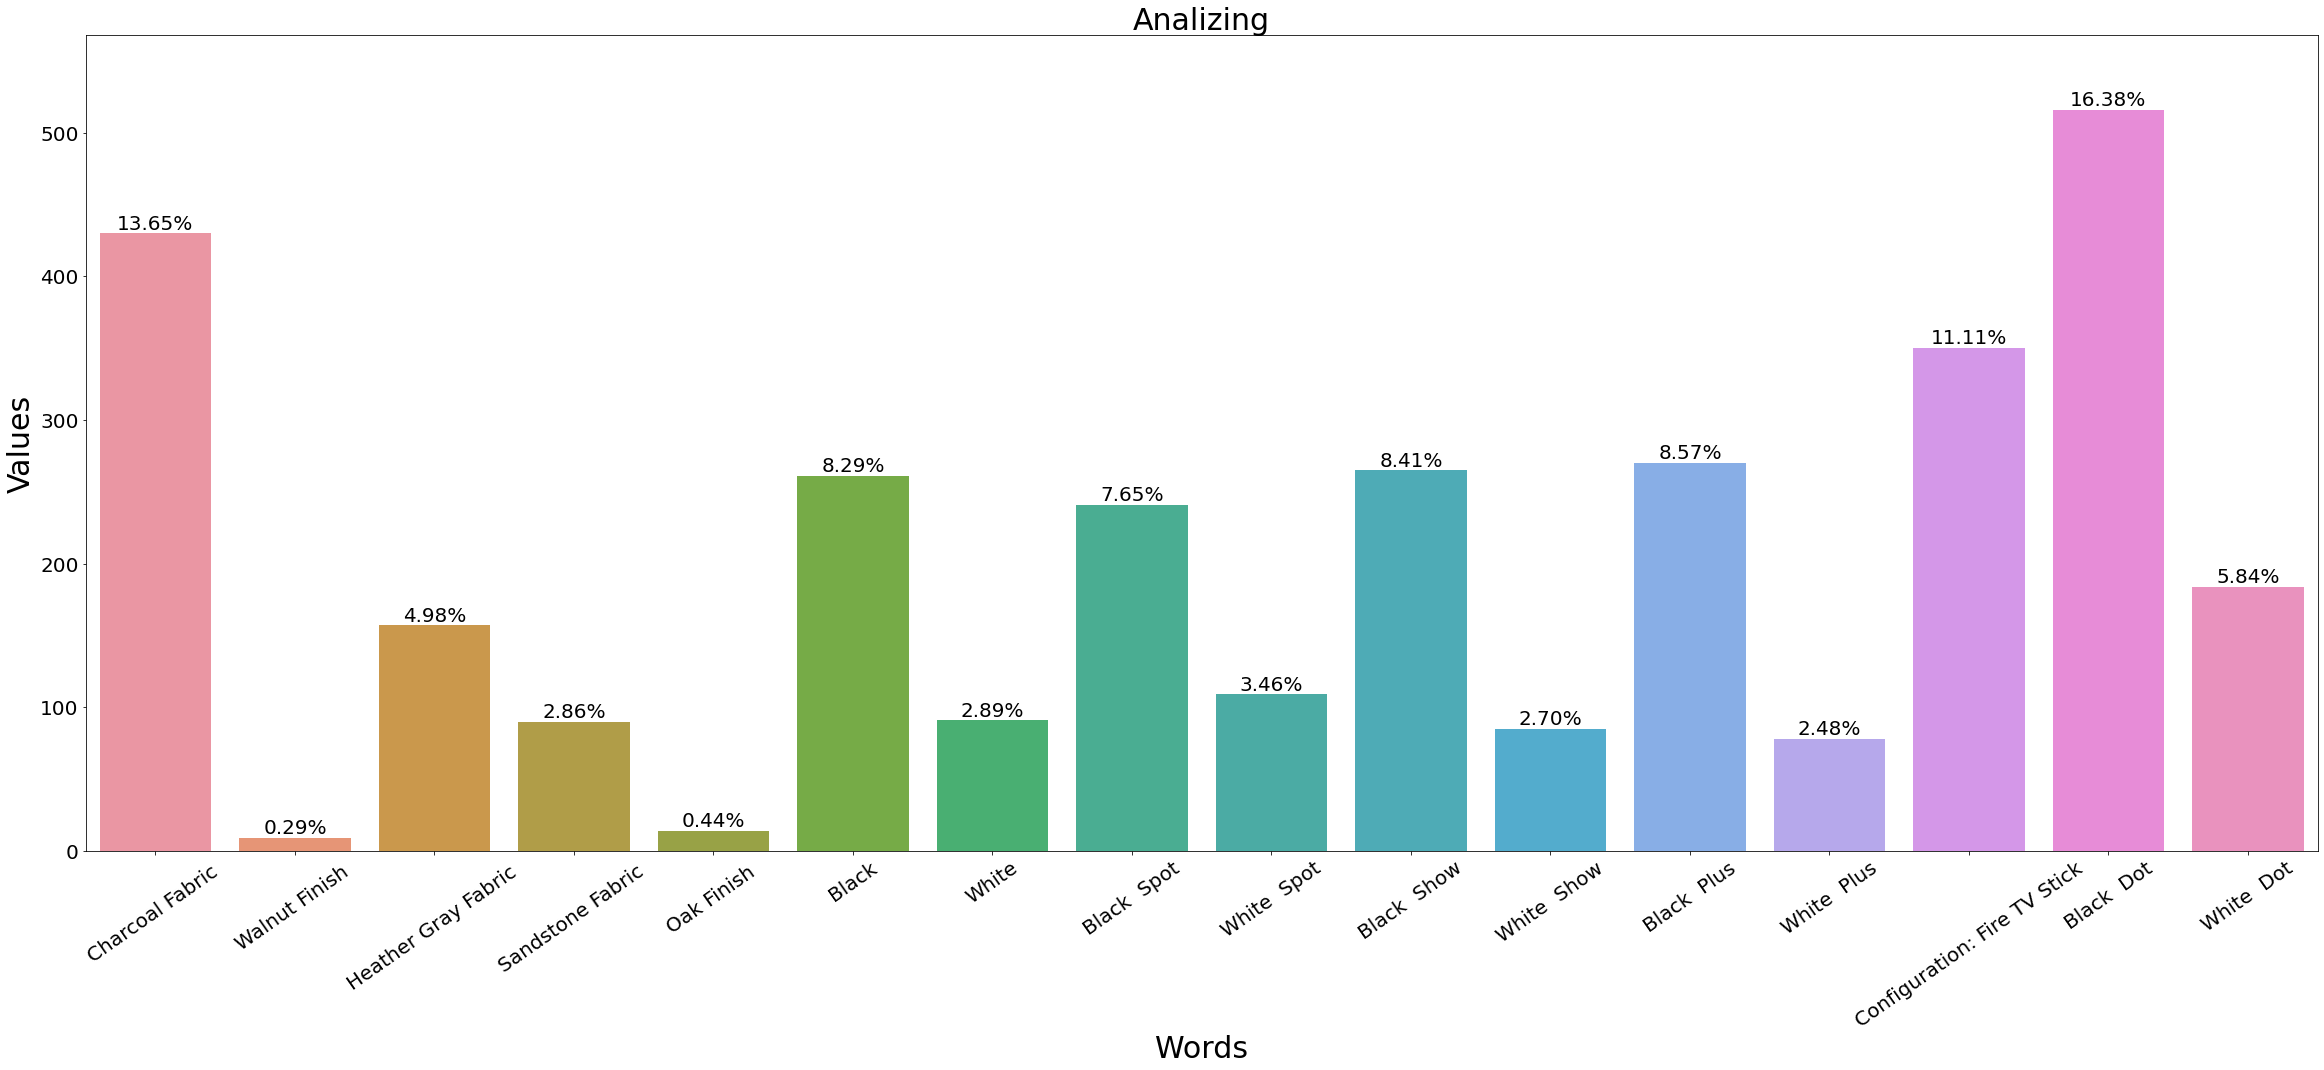

In [9]:
# Now lets look at which variation has more reviews

total = len(df_alexa)
ax1 = plt.figure(figsize=(40,15))

g = sns.countplot(x='variation', data=df_alexa)
g.set_title("Analizing", fontsize=30)
g.set_xlabel("Words", fontsize=30)
g.set_ylabel("Values", fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(rotation=35)
sizes = []
for p in g.patches:
    height = p.get_height()
    sizes.append(height)
    g.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total*100),
            ha="center", fontsize=20) 
g.set_ylim(0, max(sizes) * 1.1)

> We see that Black dot has the most reviews followed by Charcoal Fabric

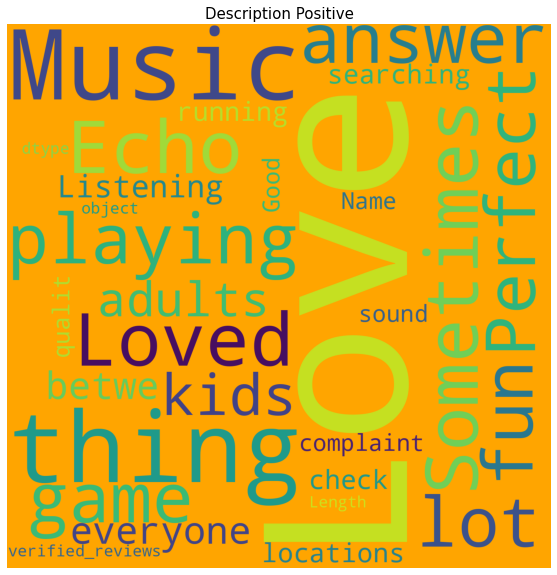

In [10]:
# For the most used words, lets make a word cloud
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(positive['verified_reviews']))
plt.title('Description Positive', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

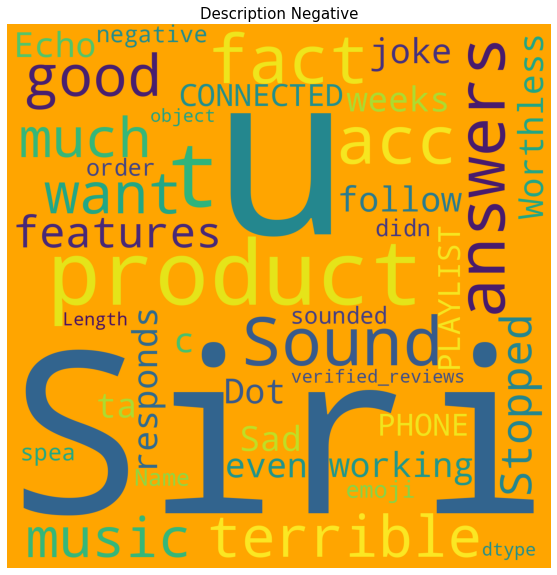

In [11]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

wc = WordCloud(background_color = 'orange', width = 1500, height = 1500).generate(str(negative['verified_reviews']))
plt.title('Description Negative', fontsize = 15)

plt.imshow(wc)
plt.axis('off')
plt.show()

## Data Preprocessing


> Now we dive into data cleaning

In [12]:
# Lets make a model for prediciton of feedback which is positive or negative
df_alexa = df_alexa.drop(['date', 'rating'], axis = 1)

In [13]:
df_alexa.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


In [14]:
# Now we one hot encode our variation columns and remove first to avoid dummy trap
variation_dummies = pd.get_dummies(df_alexa['variation'],drop_first=True)
variation_dummies

,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [15]:
df_alexa.drop(['variation'], axis = 1, inplace=True)

In [16]:
df_alexa = pd.concat([df_alexa, variation_dummies], axis = 1)
df_alexa

,verified_reviews,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


## Generating Tokens

In [17]:
vectorizer = CountVectorizer()
alexa_countvectorizer = vectorizer.fit_transform(df_alexa['verified_reviews'])

In [18]:
alexa_countvectorizer.shape

(3150, 4044)

In [19]:
# lets look at 50 the features we have got
print(vectorizer.get_feature_names()[::80])

['00', 'abode', 'advertising', 'americans', 'asking', 'basic', 'blows', 'buts', 'challenged', 'collectors', 'connection', 'crap', 'defence', 'direct', 'downloading', 'embarrassed', 'exactly', 'fans', 'floored', 'geeks', 'group', 'hell', 'human', 'initial', 'iphone', 'knows', 'liking', 'lucky', 'messed', 'my', 'noticeable', 'orders', 'pattern', 'playing', 'prior', 'quiet', 'recording', 'requesting', 'said', 'senior', 'simplified', 'solution', 'sports', 'stuff', 'talk', 'third', 'track', 'unhelpful', 'versions', 'week', 'worth']


In [20]:
df_alexa.drop(['verified_reviews'], axis = 1, inplace=True) 
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [21]:
reviews = pd.DataFrame(alexa_countvectorizer.toarray())

In [22]:
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
df_alexa = pd.concat([df_alexa, reviews], axis = 1)
df_alexa

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> Now we have our data in a way in which a machine learning model will understand i.e numbers

## Train Test Split

In [24]:
X = df_alexa.drop(['feedback'], axis = 1)
y = df_alexa['feedback']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 26)

In [26]:
x_train.shape,x_test.shape

((2520, 4059), (630, 4059))

> We have 2520 training data and 630 test/validation data

## Machine Learning Training

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
# Getting prediciton on x_test
y_pred_lreg = lreg.predict(x_test)

In [29]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[ 22  37]
 [  5 566]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.37      0.51        59
           1       0.94      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.88      0.68      0.74       630
weighted avg       0.93      0.93      0.92       630

----------------------------------------------------------------------------------------------------
Accuracy =  93.33333333 %


### LINEAR SUPPORT VECTOR CLASSIFIER

In [30]:
%%time
from sklearn.svm import SVC
# Instantiate the model
svc = SVC()
# Fit the model on training data
svc.fit(x_train, y_train)

CPU times: user 15.3 s, sys: 76.8 ms, total: 15.4 s
Wall time: 15.4 s


SVC()

In [31]:
# Getting the predictions for x_test
y_pred_svc = svc.predict(x_test)

In [32]:
print('Support Vector Classifier')
print('\n')
# Confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svc))
print('--'*50)

# Classification report
print('Classification Report')
print(classification_report(y_test, y_pred_svc))

# Accuracy
print('--'*50)
svc_accuracy = round(accuracy_score(y_test, y_pred_svc)*100,8)
print('Accuracy = ', svc_accuracy,'%')

Support Vector Classifier


Confusion Matrix
[[  2  57]
 [  0 571]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        59
           1       0.91      1.00      0.95       571

    accuracy                           0.91       630
   macro avg       0.95      0.52      0.51       630
weighted avg       0.92      0.91      0.87       630

----------------------------------------------------------------------------------------------------
Accuracy =  90.95238095 %


### K-NEAREST NEIGHBORS

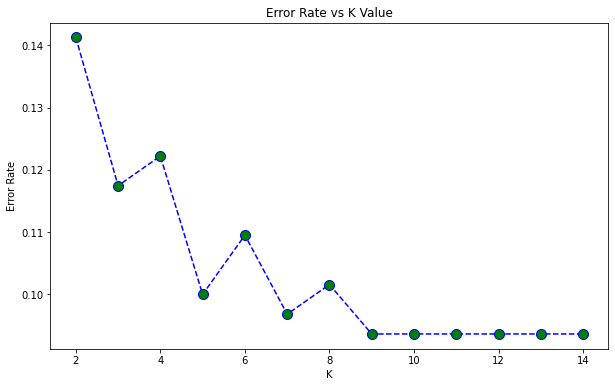

CPU times: user 3min 4s, sys: 678 ms, total: 3min 5s
Wall time: 3min 4s


In [33]:
%%time
from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(2,15), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [34]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
# Prediction of KNN
y_pred_knn_op = knn.predict(x_test)

In [36]:
print('K-Nearest Neighbors(KNN)')
print('k =',n_value)

# Confusion Matrix
print('\n')
print(confusion_matrix(y_test, y_pred_knn_op))

# Classification Report
print('--'*50)
print('Classfication Report',classification_report(y_test, y_pred_knn_op))

# Accuracy
print('--'*50)
knn_op_accuracy =round(accuracy_score(y_test, y_pred_knn_op)*100,8)
print('Accuracy = ',knn_op_accuracy,'%')

K-Nearest Neighbors(KNN)
k = 9


[[  1  58]
 [  1 570]]
----------------------------------------------------------------------------------------------------
Classfication Report               precision    recall  f1-score   support

           0       0.50      0.02      0.03        59
           1       0.91      1.00      0.95       571

    accuracy                           0.91       630
   macro avg       0.70      0.51      0.49       630
weighted avg       0.87      0.91      0.86       630

----------------------------------------------------------------------------------------------------
Accuracy =  90.63492063 %


### RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Create model object
rfc = RandomForestClassifier(n_estimators = 250,n_jobs=-1)
# Fit model to training data
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

In [38]:
print('Random Forest')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rfc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_rfc))

# Accuracy
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rfc)*100,8)
print('Accuracy = ', rf_accuracy,'%')

Random Forest


Confusion Matrix
[[  9  50]
 [  1 570]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.15      0.26        59
           1       0.92      1.00      0.96       571

    accuracy                           0.92       630
   macro avg       0.91      0.58      0.61       630
weighted avg       0.92      0.92      0.89       630

----------------------------------------------------------------------------------------------------
Accuracy =  91.9047619 %


### XGBoost Classifier

In [39]:
from xgboost import XGBClassifier

# Create model object
xgb = XGBClassifier(n_jobs=-1)

# Fit model to training data
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:54:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [40]:
print('XGBoost Classifer')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_xgb))

# Accuracy
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb)*100,8)
print('Accuracy = ', xgb_accuracy,'%')

XGBoost Classifer


Confusion Matrix
[[ 19  40]
 [  6 565]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.32      0.45        59
           1       0.93      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.85      0.66      0.71       630
weighted avg       0.92      0.93      0.91       630

----------------------------------------------------------------------------------------------------
Accuracy =  92.6984127 %


### Gradient Boosting Classifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Create model object
gbc = GradientBoostingClassifier()

# Fit model to training data
gbc.fit(x_train, y_train)
y_pred_gbc = xgb.predict(x_test)

In [42]:
print('Gradient Boosting Classifier')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gbc))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_gbc))

# Accuracy
print('--'*50)
gbc_accuracy = round(accuracy_score(y_test, y_pred_gbc)*100,8)
print('Accuracy = ', gbc_accuracy,'%')

Gradient Boosting Classifier


Confusion Matrix
[[ 19  40]
 [  6 565]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.32      0.45        59
           1       0.93      0.99      0.96       571

    accuracy                           0.93       630
   macro avg       0.85      0.66      0.71       630
weighted avg       0.92      0.93      0.91       630

----------------------------------------------------------------------------------------------------
Accuracy =  92.6984127 %


### Tensorflow Sequential CNN Model

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

In [44]:
x_train = x_train.to_numpy().reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.to_numpy().reshape(x_test.shape[0], x_test.shape[1], 1)

In [45]:
# model creation
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (4059,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics=['accuracy'])

2022-02-15 13:55:15.352110: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 4058, 32)          96        
_________________________________________________________________
batch_normalization (BatchNo (None, 4058, 32)          128       
_________________________________________________________________
dropout (Dropout)            (None, 4058, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 4057, 64)          4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 4057, 64)          256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 4057, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 259648)            0

In [47]:
#adding a checkpointer to save the model weights if the accuracy improves over validation dataset
checkpointer = [EarlyStopping(monitor = 'val_accuracy', verbose = 1, restore_best_weights=True,mode="max",patience = 9),
                ModelCheckpoint(
                    filepath='model.weights.best.hdf5',
                    monitor="val_accuracy",
                    verbose=1,
                    save_best_only=True,
                    mode="max")]

In [48]:
%%time
#training the model
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test, y_test), verbose=1, callbacks=checkpointer)

2022-02-15 13:55:16.489489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
79/79 [==============================] - 24s 290ms/step - loss: 2.6022 - accuracy: 0.8988 - val_loss: 0.5334 - val_accuracy: 0.9063

Epoch 00001: val_accuracy improved from -inf to 0.90635, saving model to model.weights.best.hdf5
Epoch 2/40
79/79 [==============================] - 22s 283ms/step - loss: 0.4016 - accuracy: 0.9230 - val_loss: 0.4071 - val_accuracy: 0.9063

Epoch 00002: val_accuracy did not improve from 0.90635
Epoch 3/40
79/79 [==============================] - 23s 288ms/step - loss: 0.3279 - accuracy: 0.9242 - val_loss: 0.3837 - val_accuracy: 0.9063

Epoch 00003: val_accuracy did not improve from 0.90635
Epoch 4/40
79/79 [==============================] - 23s 286ms/step - loss: 0.3039 - accuracy: 0.9234 - val_loss: 0.4091 - val_accuracy: 0.9063

Epoch 00004: val_accuracy did not improve from 0.90635
Epoch 5/40
79/79 [==============================] - 22s 280ms/step - loss: 0.2761 - accuracy: 0.9246 - val_loss: 0.5168 - val_accuracy: 0.9063

Epoch 00005: val_a

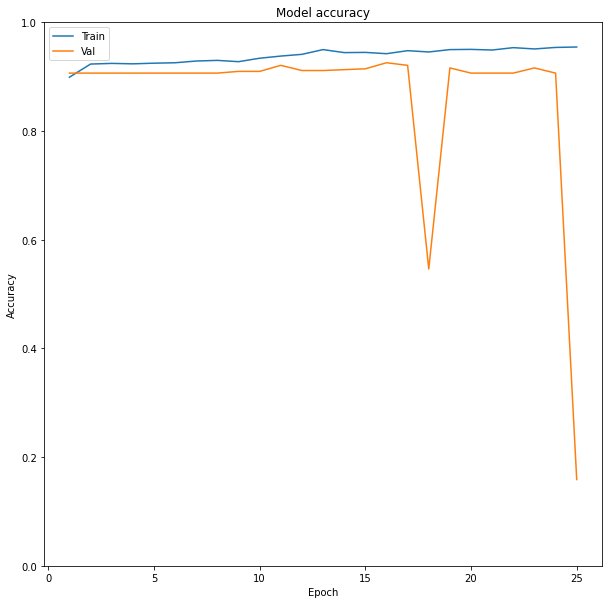

In [49]:
# plotting curve of model accuracy over the training time
epochs = len(history.history['accuracy'])
epoch_range = range(1, epochs+1)
plt.plot(epoch_range, history.history['accuracy'])
plt.plot(epoch_range, history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(bottom = 0,top=1)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

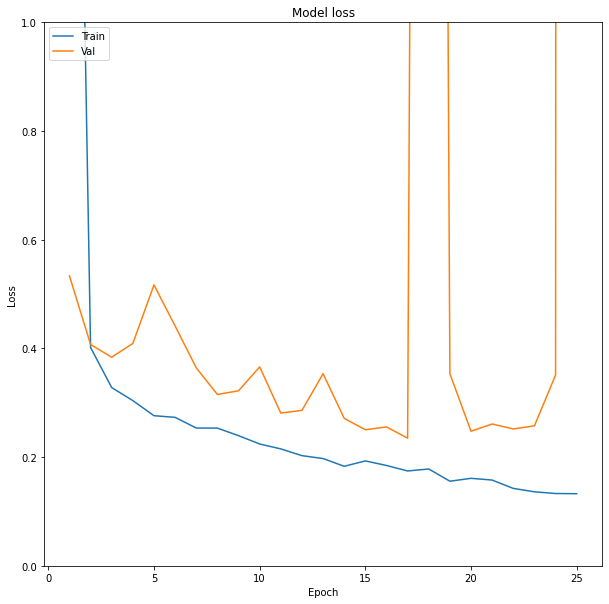

In [50]:
# plotting curve of model loss over the training time
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(bottom = 0,top=1)
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [51]:
y_pred_tf = model.predict(x_test)

In [52]:
y_pred_tf = [int(i>=0.5) for i in y_pred_tf]

In [53]:
print('Tensorflow Sequential Model')
# Confusion matrix
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_tf))

# Classification report
print('--'*50)
print('Classification Report')
print(classification_report(y_test, y_pred_tf))

# Accuracy
print('--'*50)
tf_accuracy = round(accuracy_score(y_test, y_pred_tf)*100,8)
print('Accuracy = ', tf_accuracy,'%')

Tensorflow Sequential Model


Confusion Matrix
[[ 32  27]
 [ 20 551]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.54      0.58        59
           1       0.95      0.96      0.96       571

    accuracy                           0.93       630
   macro avg       0.78      0.75      0.77       630
weighted avg       0.92      0.93      0.92       630

----------------------------------------------------------------------------------------------------
Accuracy =  92.53968254 %


## Models Report

In [54]:
models = pd.DataFrame({
     'Model': ['Logistic Regression', 'Linear SVC', 
               'K-Nearest Neighbors', 'Random Forest','XGBoost Classifier','Gradient Boosting Classifier','Tensorflow CNN Model'],
    'Score': [logreg_accuracy, svc_accuracy, 
               knn_op_accuracy, rf_accuracy,xgb_accuracy,gbc_accuracy,tf_accuracy]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,93.333333
4,XGBoost Classifier,92.698413
5,Gradient Boosting Classifier,92.698413
6,Tensorflow CNN Model,92.539683
3,Random Forest,91.904762
1,Linear SVC,90.952381
2,K-Nearest Neighbors,90.634921


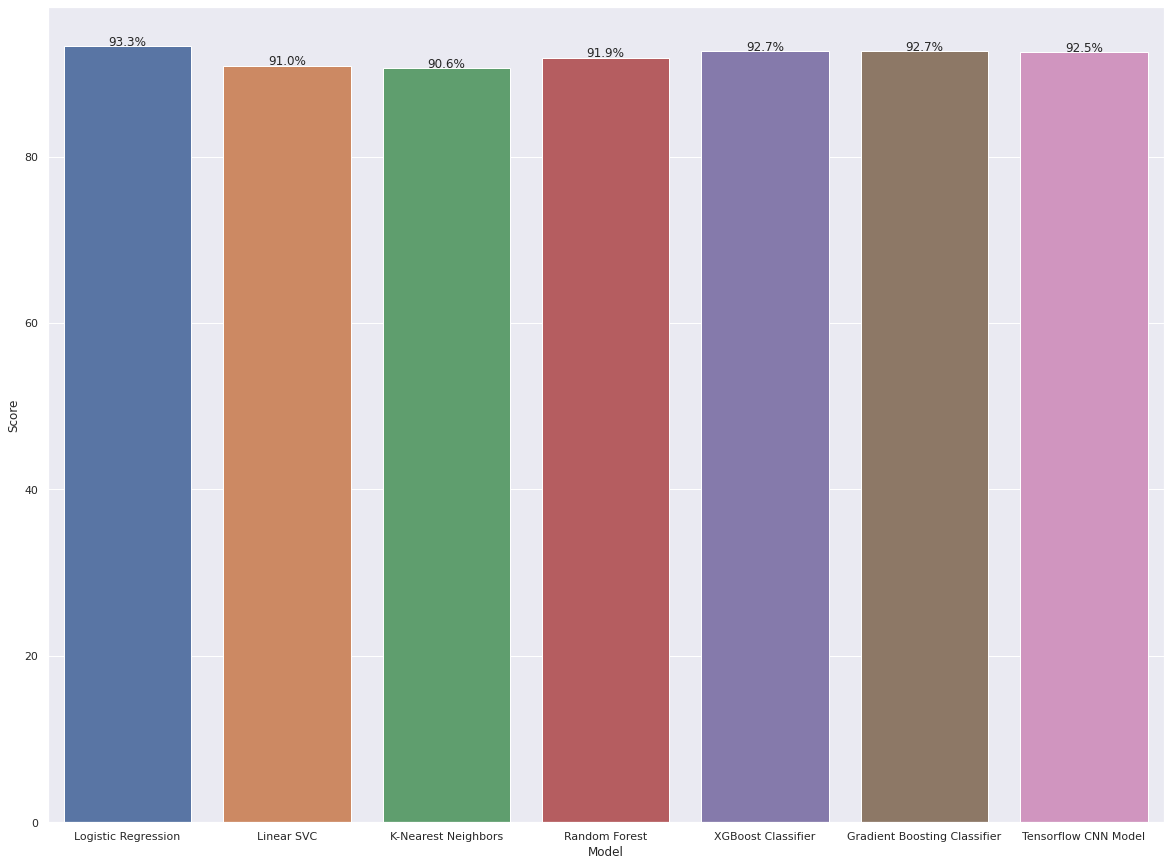

In [55]:
sns.set(rc={'figure.figsize':(20,15)})
ax = sns.barplot(x="Model", y="Score", data=models)
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(models['Score'][i]), (x, y), ha='center')
plt.show()